In [3]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras import models
import cv2
import numpy as np
import json
import os
import segmentation_models as sm
import glob
from matplotlib import pyplot as plt

In [5]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [8]:
ls

 20200812_130629-COLLAGE~2.jpg   images/                   test.png
 Classroom/                      IMG_20190208_130153.jpg
'Colab Notebooks'/               masks/


In [9]:
SIZE_X = 128 
SIZE_Y = 128

train_images = []

In [10]:
for directory_path in glob.glob("/content/drive/My Drive/images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

In [11]:
train_masks = [] 

for directory_path in glob.glob("/content/drive/My Drive/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [12]:
X = train_images
Y = train_masks

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [14]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                                3)                                                          

In [15]:
model.fit(
   x=x_train,
   y=y_train,
   epochs=10,
   verbose=1,
   validation_data=(x_val, y_val),
)

Epoch 1/10
1/1 [==============================] - 25s 25s/step - loss: 0.7430 - mse: 0.3411 - val_loss: 0.6476 - val_mse: 0.2946
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 0.6706 - mse: 0.3098 - val_loss: 1.0884 - val_mse: 0.4803
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.6282 - mse: 0.2916 - val_loss: 1.8081 - val_mse: 0.6227
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 0.5549 - mse: 0.2563 - val_loss: 3.2930 - val_mse: 0.7448
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.4997 - mse: 0.2296 - val_loss: 4.6296 - val_mse: 0.7980
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.4590 - mse: 0.2109 - val_loss: 5.3713 - val_mse: 0.8185
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.4236 - mse: 0.1947 - val_loss: 5.7043 - val_mse: 0.7963
Epoch 8/10
1/1 [==============================] - 7s 7s/step - loss: 0.3934 - mse: 0.1815 - val_loss: 5.7787 

1/1 [==============================] - 1s 1s/step


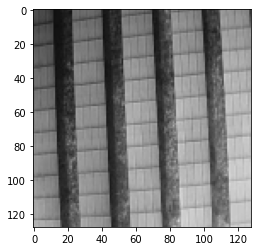

In [16]:
test_img = cv2.imread('/content/drive/My Drive/test.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

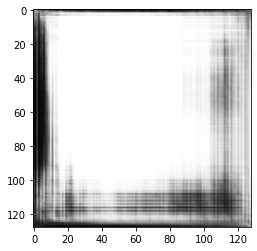

In [17]:
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')